In [1]:
import pandas as pd
import censusdata
import geopandas
import matplotlib.pyplot as plt
import numpy as np
import glob

%matplotlib inline
%config InlineBackend.figure_format ='retina'
import os

In [2]:
# pip install xlrd

In [3]:
import xlrd

In [4]:
os.getcwd()

'/users/brockd/Liminal_Cities'

In [5]:
from config import *

In [6]:
statesShp = geopandas.read_file(dataFolder + "/cb_2018_us_state_500k.zip").to_crs(3857)
statesShp = statesShp[['GEOID', 'STUSPS', 'NAME', 'geometry']]

def plotUS():
    ax = statesShp.plot(figsize=(20, 10))
    ax.axis('equal')
    plt.xlim(-1.5e7, -0.7e7)
    plt.ylim(2.5e6, 7e6)
    return ax

In [7]:
hpi = pd.read_excel("HPI_AT_BDL_cbsa.xlsx", skiprows=6)

FileNotFoundError: [Errno 2] No such file or directory: 'HPI_AT_BDL_cbsa.xlsx'

In [41]:
hpi

,CBSA,Name,Year,Annual Change (%),HPI,HPI with 1990 base,HPI with 2000 base
0,1,Alabama(non CBSA areas),1985,.,100.00,91.02,62.66
1,1,Alabama(non CBSA areas),1986,6.76,106.76,97.17,66.89
2,1,Alabama(non CBSA areas),1987,0.50,107.29,97.65,67.22
3,1,Alabama(non CBSA areas),1988,-0.10,107.17,97.55,67.15
4,1,Alabama(non CBSA areas),1989,4.85,112.37,102.28,70.41
...,...,...,...,...,...,...,...
40702,49780,"Zanesville, OH",2018,6.71,295.73,213.15,127.39
40703,49780,"Zanesville, OH",2019,4.73,309.72,223.23,133.42
40704,49780,"Zanesville, OH",2020,3.57,320.78,231.21,138.19
40705,49780,"Zanesville, OH",2021,11.67,358.21,258.19,154.31


In [42]:
print(hpi.dtypes)

CBSA                   int64
Name                  object
Year                   int64
Annual Change (%)     object
HPI                   object
HPI with 1990 base    object
HPI with 2000 base    object
dtype: object


In [43]:
# Convert relevant columns to numeric data types
hpi['Annual Change (%)'] = pd.to_numeric(hpi['Annual Change (%)'], errors='coerce')
hpi['HPI'] = pd.to_numeric(hpi['HPI'], errors='coerce')
hpi['HPI with 1990 base'] = pd.to_numeric(hpi['HPI with 1990 base'], errors='coerce')
hpi['HPI with 2000 base'] = pd.to_numeric(hpi['HPI with 2000 base'], errors='coerce')


In [44]:
dataByCbsa = hpi

In [45]:
dataByCbsa

,CBSA,Name,Year,Annual Change (%),HPI,HPI with 1990 base,HPI with 2000 base
0,1,Alabama(non CBSA areas),1985,NaN,100.00,91.02,62.66
1,1,Alabama(non CBSA areas),1986,6.76,106.76,97.17,66.89
2,1,Alabama(non CBSA areas),1987,0.50,107.29,97.65,67.22
3,1,Alabama(non CBSA areas),1988,-0.10,107.17,97.55,67.15
4,1,Alabama(non CBSA areas),1989,4.85,112.37,102.28,70.41
...,...,...,...,...,...,...,...
40702,49780,"Zanesville, OH",2018,6.71,295.73,213.15,127.39
40703,49780,"Zanesville, OH",2019,4.73,309.72,223.23,133.42
40704,49780,"Zanesville, OH",2020,3.57,320.78,231.21,138.19
40705,49780,"Zanesville, OH",2021,11.67,358.21,258.19,154.31


In [73]:
#dataByCbsa.to_pickle(dataFolder + "HPI/hpi.pkl")

In [46]:
gdf = pd.read_pickle(sharedFolder + 'gdf.pkl')
gdf

,CBSA,LSAD,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,NAME,geometry,metro,micro,buff,inBuff,commuteBuffCount_19,workingPop_19,commutePercent_19,commuteBuffCount_20,workingPop_20,commutePercent_20,liminal
0,10180,Metropolitan Statistical Area,176866,177829,179308,"Abilene, TX","POLYGON ((-11148262.500 3832132.455, -11148249...",False,False,"POLYGON ((-11309677.340 3783320.344, -11309649...",True,7720.0,69422.0,11.120394,7146.0,66780.0,10.700809,False
1,10420,Metropolitan Statistical Area,701625,696225,697627,"Akron, OH","POLYGON ((-9060481.928 5063847.837, -9060475.5...",False,False,"POLYGON ((-9254365.317 5020257.954, -9254364.7...",True,90313.0,323548.0,27.913324,86722.0,306288.0,28.313875,False
2,10500,Metropolitan Statistical Area,148244,144922,145786,"Albany, GA","POLYGON ((-9400975.184 3713776.408, -9400980.6...",False,False,"POLYGON ((-9578772.815 3741602.731, -9578761.8...",True,4136.0,53083.0,7.791572,3686.0,50430.0,7.309141,False
3,10540,Metropolitan Statistical Area,128978,129948,130467,"Albany-Lebanon, OR","POLYGON ((-13720236.776 5551262.937, -13720393...",False,False,"POLYGON ((-13880404.968 5518947.795, -13880524...",True,6558.0,55731.0,11.767239,6390.0,54728.0,11.675925,False
4,10580,Metropolitan Statistical Area,899748,905369,904617,"Albany-Schenectady-Troy, NY","POLYGON ((-8247992.807 5305256.748, -8248085.6...",False,False,"POLYGON ((-8472736.168 5278351.957, -8472566.1...",True,25671.0,418341.0,6.136382,25289.0,390058.0,6.483395,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,49300,Micropolitan Statistical Area,116906,116129,116559,"Wooster, OH","POLYGON ((-9089178.853 5010653.858, -9088979.1...",False,False,"POLYGON ((-9303427.427 5003041.204, -9303435.5...",True,8894.0,50856.0,17.488595,8380.0,48312.0,17.345587,False
922,49380,Micropolitan Statistical Area,22207,22047,21947,"Worthington, MN","POLYGON ((-10627927.538 5441934.306, -10627791...",False,True,"POLYGON ((-10853572.863 5404615.190, -10853573...",False,0.0,10260.0,0.000000,0.0,9763.0,0.000000,False
923,49460,Micropolitan Statistical Area,23282,23334,23373,"Yankton, SD","POLYGON ((-10855702.126 5337734.746, -10853435...",False,True,"POLYGON ((-11029881.460 5334892.015, -11029883...",False,0.0,10934.0,0.000000,0.0,10222.0,0.000000,False
924,49780,Micropolitan Statistical Area,86450,86574,86113,"Zanesville, OH","POLYGON ((-9149881.580 4868949.855, -9149879.9...",False,True,"POLYGON ((-9314594.513 4866712.033, -9313763.6...",True,9978.0,34969.0,28.533844,10044.0,33194.0,30.258480,True


In [51]:
merge = pd.merge(gdf, dataByCbsa, on='CBSA', how='left')
merge

,CBSA,LSAD,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,NAME,geometry,metro,micro,buff,...,commuteBuffCount_20,workingPop_20,commutePercent_20,liminal,Name,Year,Annual Change (%),HPI,HPI with 1990 base,HPI with 2000 base
0,10180,Metropolitan Statistical Area,176866,177829,179308,"Abilene, TX","POLYGON ((-11148262.500 3832132.455, -11148249...",False,False,"POLYGON ((-11309677.340 3783320.344, -11309649...",...,7146.0,66780.0,10.700809,False,"Abilene, TX",1976.0,NaN,100.00,70.81,49.64
1,10180,Metropolitan Statistical Area,176866,177829,179308,"Abilene, TX","POLYGON ((-11148262.500 3832132.455, -11148249...",False,False,"POLYGON ((-11309677.340 3783320.344, -11309649...",...,7146.0,66780.0,10.700809,False,"Abilene, TX",1977.0,8.22,108.22,76.63,53.73
2,10180,Metropolitan Statistical Area,176866,177829,179308,"Abilene, TX","POLYGON ((-11148262.500 3832132.455, -11148249...",False,False,"POLYGON ((-11309677.340 3783320.344, -11309649...",...,7146.0,66780.0,10.700809,False,"Abilene, TX",1978.0,18.68,128.43,90.94,63.76
3,10180,Metropolitan Statistical Area,176866,177829,179308,"Abilene, TX","POLYGON ((-11148262.500 3832132.455, -11148249...",False,False,"POLYGON ((-11309677.340 3783320.344, -11309649...",...,7146.0,66780.0,10.700809,False,"Abilene, TX",1979.0,7.23,137.72,97.51,68.37
4,10180,Metropolitan Statistical Area,176866,177829,179308,"Abilene, TX","POLYGON ((-11148262.500 3832132.455, -11148249...",False,False,"POLYGON ((-11309677.340 3783320.344, -11309649...",...,7146.0,66780.0,10.700809,False,"Abilene, TX",1980.0,9.08,150.22,106.37,74.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38753,49780,Micropolitan Statistical Area,86450,86574,86113,"Zanesville, OH","POLYGON ((-9149881.580 4868949.855, -9149879.9...",False,True,"POLYGON ((-9314594.513 4866712.033, -9313763.6...",...,10044.0,33194.0,30.258480,True,"Zanesville, OH",2019.0,4.73,309.72,223.23,133.42
38754,49780,Micropolitan Statistical Area,86450,86574,86113,"Zanesville, OH","POLYGON ((-9149881.580 4868949.855, -9149879.9...",False,True,"POLYGON ((-9314594.513 4866712.033, -9313763.6...",...,10044.0,33194.0,30.258480,True,"Zanesville, OH",2020.0,3.57,320.78,231.21,138.19
38755,49780,Micropolitan Statistical Area,86450,86574,86113,"Zanesville, OH","POLYGON ((-9149881.580 4868949.855, -9149879.9...",False,True,"POLYGON ((-9314594.513 4866712.033, -9313763.6...",...,10044.0,33194.0,30.258480,True,"Zanesville, OH",2021.0,11.67,358.21,258.19,154.31
38756,49780,Micropolitan Statistical Area,86450,86574,86113,"Zanesville, OH","POLYGON ((-9149881.580 4868949.855, -9149879.9...",False,True,"POLYGON ((-9314594.513 4866712.033, -9313763.6...",...,10044.0,33194.0,30.258480,True,"Zanesville, OH",2022.0,16.27,416.50,300.20,179.42


In [52]:
merge.columns

Index(['CBSA', 'LSAD', 'POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022',
       'NAME', 'geometry', 'metro', 'micro', 'buff', 'inBuff',
       'commuteBuffCount_19', 'workingPop_19', 'commutePercent_19',
       'commuteBuffCount_20', 'workingPop_20', 'commutePercent_20', 'liminal',
       'Name', 'Year', 'Annual Change (%)', 'HPI', 'HPI with 1990 base',
       'HPI with 2000 base'],
      dtype='object')

In [72]:
merge

,CBSA,LSAD,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,NAME,geometry,metro,micro,buff,...,commuteBuffCount_20,workingPop_20,commutePercent_20,liminal,Name,Year,Annual Change (%),HPI,HPI with 1990 base,HPI with 2000 base
0,10180,Metropolitan Statistical Area,176866,177829,179308,"Abilene, TX","POLYGON ((-11148262.500 3832132.455, -11148249...",False,False,"POLYGON ((-11309677.340 3783320.344, -11309649...",...,7146.0,66780.0,10.700809,False,"Abilene, TX",1976.0,NaN,100.00,70.81,49.64
1,10180,Metropolitan Statistical Area,176866,177829,179308,"Abilene, TX","POLYGON ((-11148262.500 3832132.455, -11148249...",False,False,"POLYGON ((-11309677.340 3783320.344, -11309649...",...,7146.0,66780.0,10.700809,False,"Abilene, TX",1977.0,8.22,108.22,76.63,53.73
2,10180,Metropolitan Statistical Area,176866,177829,179308,"Abilene, TX","POLYGON ((-11148262.500 3832132.455, -11148249...",False,False,"POLYGON ((-11309677.340 3783320.344, -11309649...",...,7146.0,66780.0,10.700809,False,"Abilene, TX",1978.0,18.68,128.43,90.94,63.76
3,10180,Metropolitan Statistical Area,176866,177829,179308,"Abilene, TX","POLYGON ((-11148262.500 3832132.455, -11148249...",False,False,"POLYGON ((-11309677.340 3783320.344, -11309649...",...,7146.0,66780.0,10.700809,False,"Abilene, TX",1979.0,7.23,137.72,97.51,68.37
4,10180,Metropolitan Statistical Area,176866,177829,179308,"Abilene, TX","POLYGON ((-11148262.500 3832132.455, -11148249...",False,False,"POLYGON ((-11309677.340 3783320.344, -11309649...",...,7146.0,66780.0,10.700809,False,"Abilene, TX",1980.0,9.08,150.22,106.37,74.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38753,49780,Micropolitan Statistical Area,86450,86574,86113,"Zanesville, OH","POLYGON ((-9149881.580 4868949.855, -9149879.9...",False,True,"POLYGON ((-9314594.513 4866712.033, -9313763.6...",...,10044.0,33194.0,30.258480,True,"Zanesville, OH",2019.0,4.73,309.72,223.23,133.42
38754,49780,Micropolitan Statistical Area,86450,86574,86113,"Zanesville, OH","POLYGON ((-9149881.580 4868949.855, -9149879.9...",False,True,"POLYGON ((-9314594.513 4866712.033, -9313763.6...",...,10044.0,33194.0,30.258480,True,"Zanesville, OH",2020.0,3.57,320.78,231.21,138.19
38755,49780,Micropolitan Statistical Area,86450,86574,86113,"Zanesville, OH","POLYGON ((-9149881.580 4868949.855, -9149879.9...",False,True,"POLYGON ((-9314594.513 4866712.033, -9313763.6...",...,10044.0,33194.0,30.258480,True,"Zanesville, OH",2021.0,11.67,358.21,258.19,154.31
38756,49780,Micropolitan Statistical Area,86450,86574,86113,"Zanesville, OH","POLYGON ((-9149881.580 4868949.855, -9149879.9...",False,True,"POLYGON ((-9314594.513 4866712.033, -9313763.6...",...,10044.0,33194.0,30.258480,True,"Zanesville, OH",2022.0,16.27,416.50,300.20,179.42


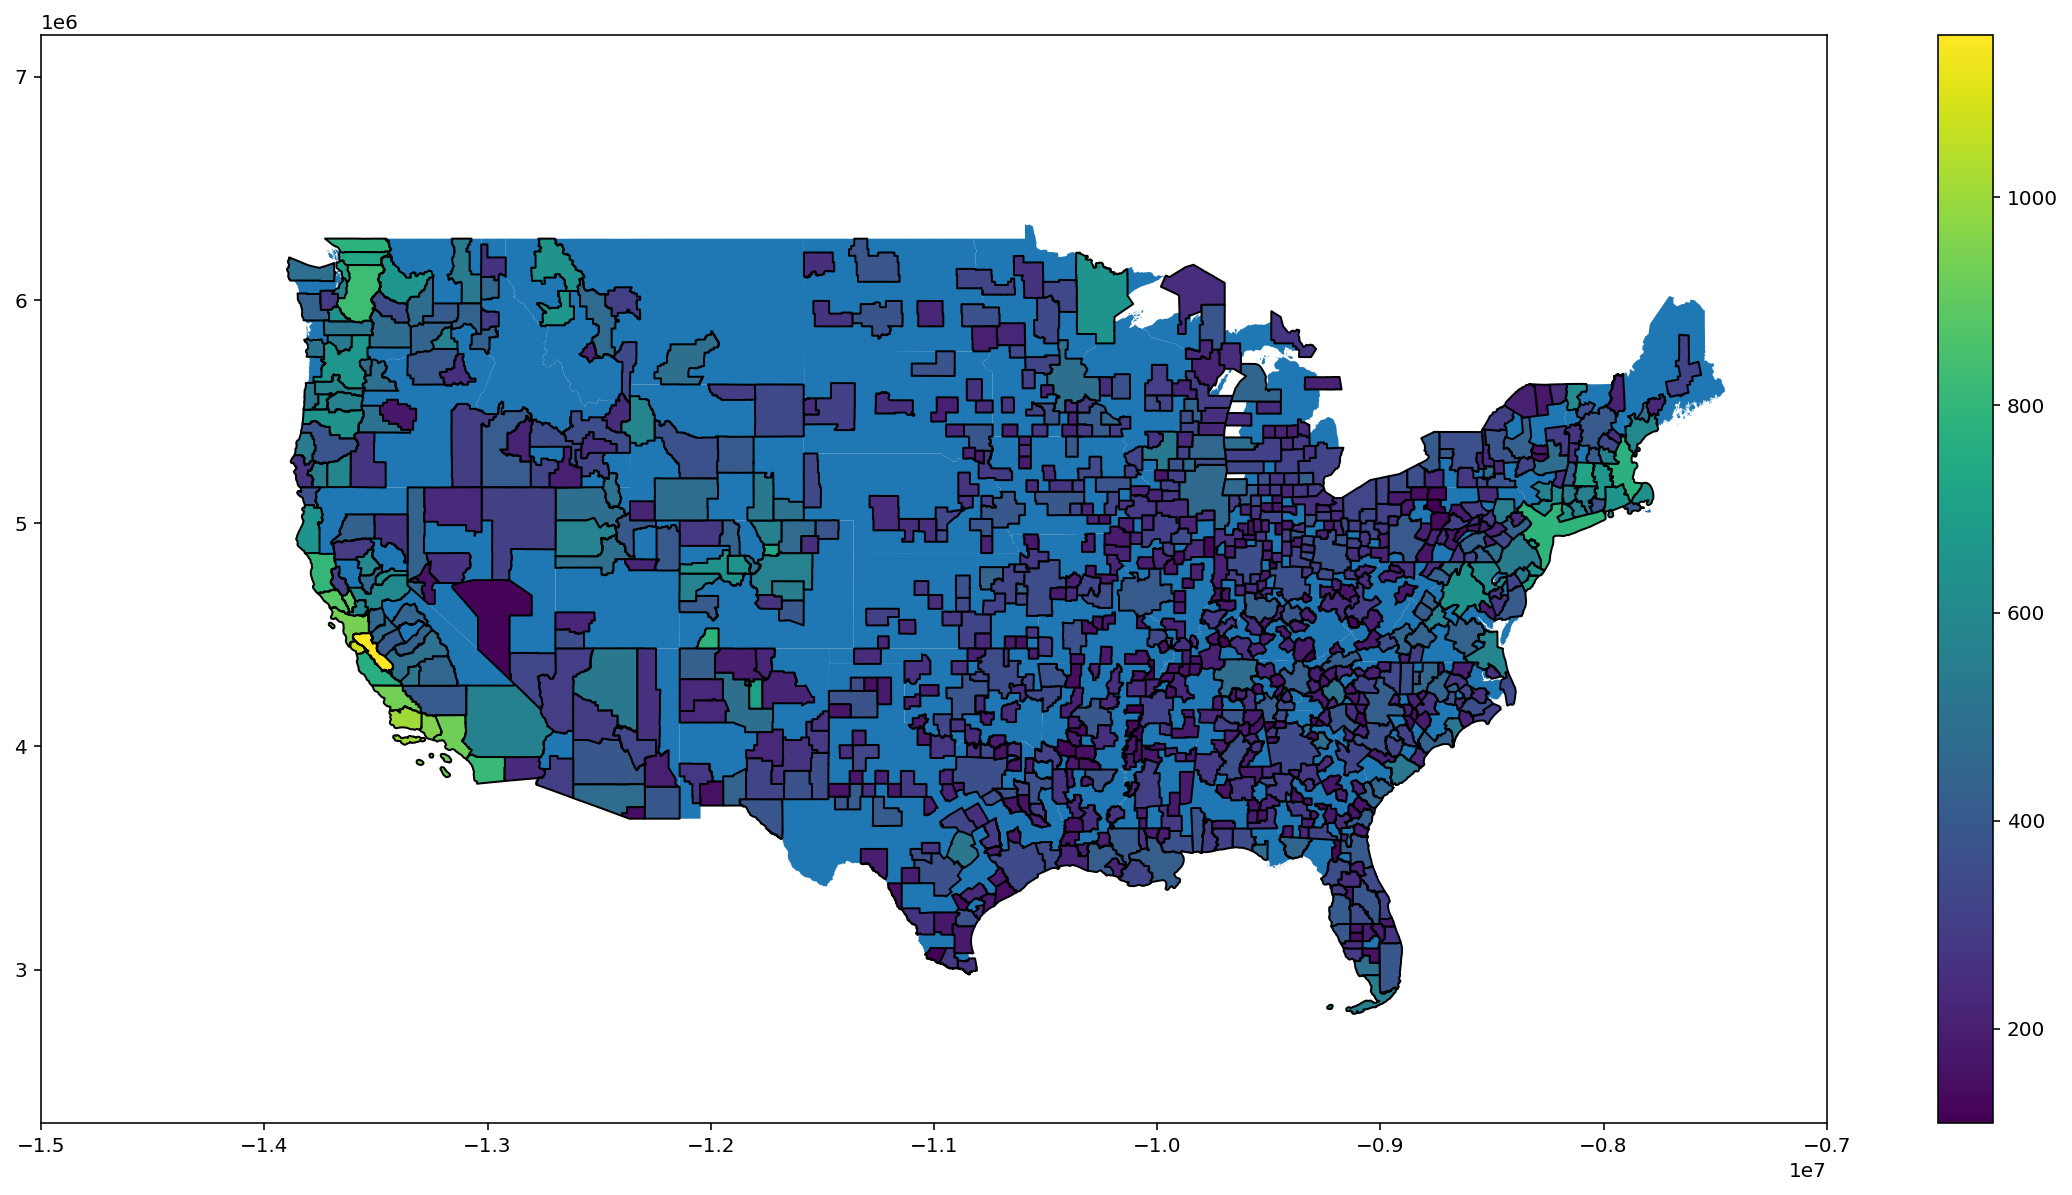

In [54]:
ax = plotUS()
merge[merge['Year'] == 2010].plot(ax=ax, column='HPI', edgecolor="black", linewidth=1, legend=True);

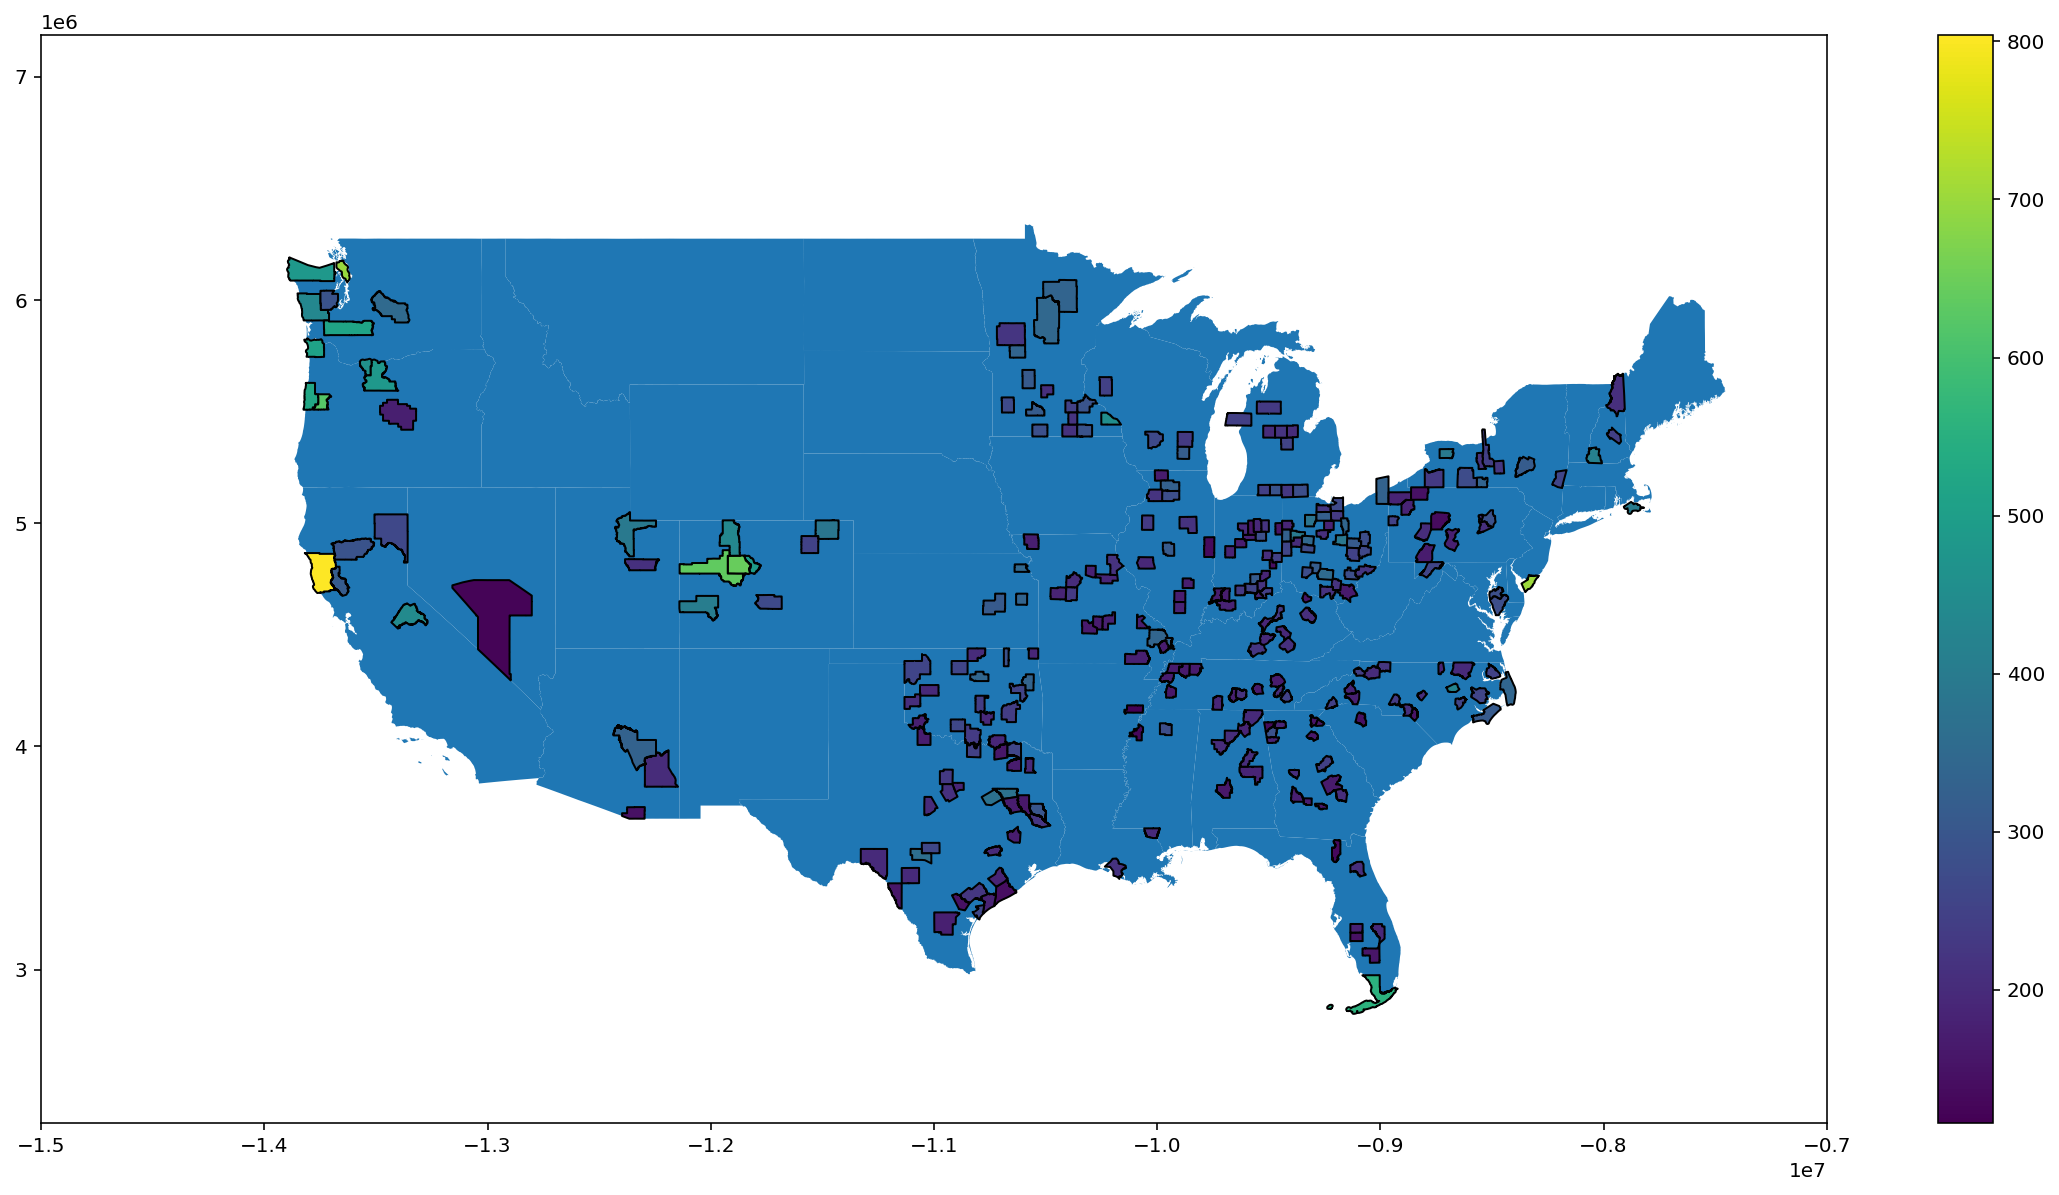

In [55]:
ax = plotUS()
merge[(merge['Year'] == 2010) & (merge['liminal'])].plot(ax=ax, column='HPI', edgecolor="black", linewidth=1, legend=True);

In [56]:
merge['Year'].unique

<bound method Series.unique of 0        1976.0
1        1977.0
2        1978.0
3        1979.0
4        1980.0
          ...  
38753    2019.0
38754    2020.0
38755    2021.0
38756    2022.0
38757       NaN
Name: Year, Length: 38758, dtype: float64>

In [57]:
merge[(merge['Year'] == 2019) & (merge['liminal'])]['HPI'].mean()

310.38432055749126

In [58]:
merge[(merge['Year'] == 2010) & (merge['liminal'])]['HPI'].mean()

251.01473867595817

In [59]:
merge[(merge['Year'] == 2019) & (merge['metro'])]['HPI'].mean()

719.6369642857143

In [60]:
merge[(merge['Year'] == 2019) & (~merge['liminal']) & (merge['micro'])]['HPI'].mean()

299.3306557377049

In [61]:
merge[(merge['Year'] == 2010) & (~merge['liminal']) & (merge['micro'])]['HPI'].mean()

245.46438524590164

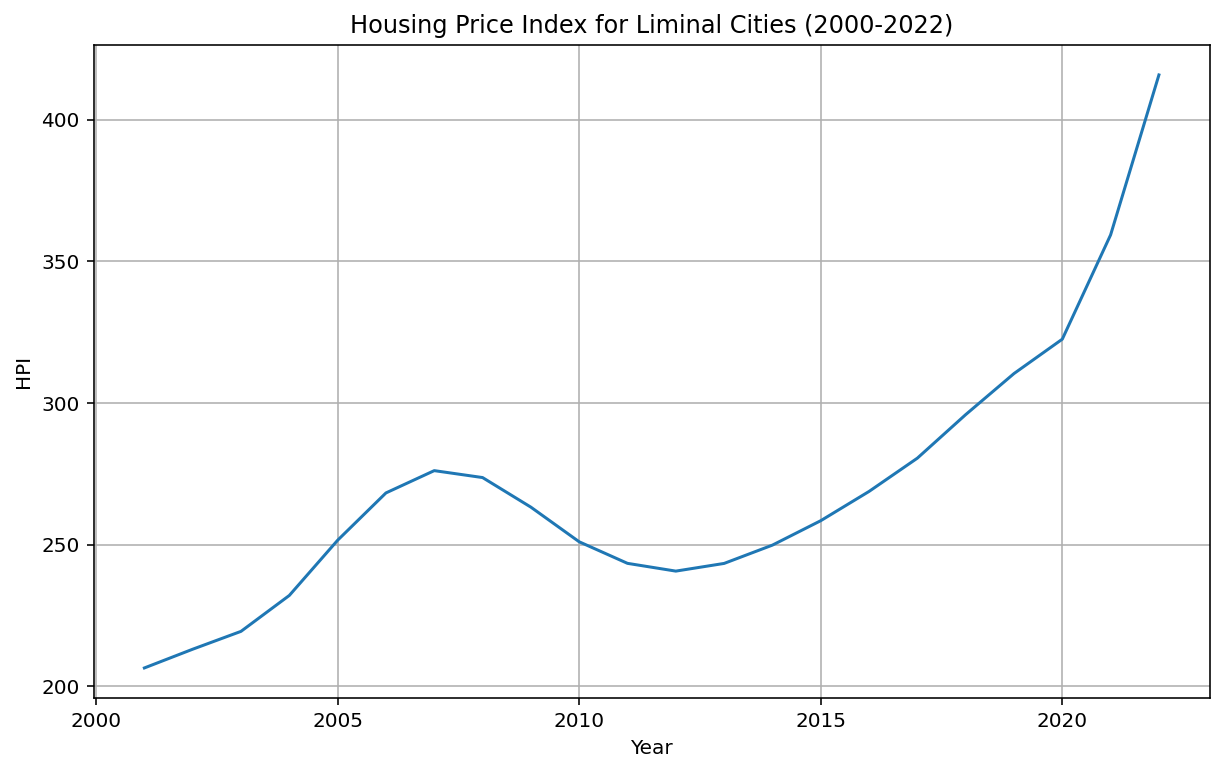

In [62]:
filter1 = merge[(merge['Year'] > 2000) & (merge['Year'] <= 2022) & (merge['liminal'])]
mean_hpi = filter1.groupby('Year')['HPI'].mean()

plt.figure(figsize=(10, 6))
plt.plot(mean_hpi.index, mean_hpi.values)
plt.title('Housing Price Index for Liminal Cities (2000-2022)')
plt.xlabel('Year')
plt.ylabel('HPI')
plt.grid(True)
plt.show()

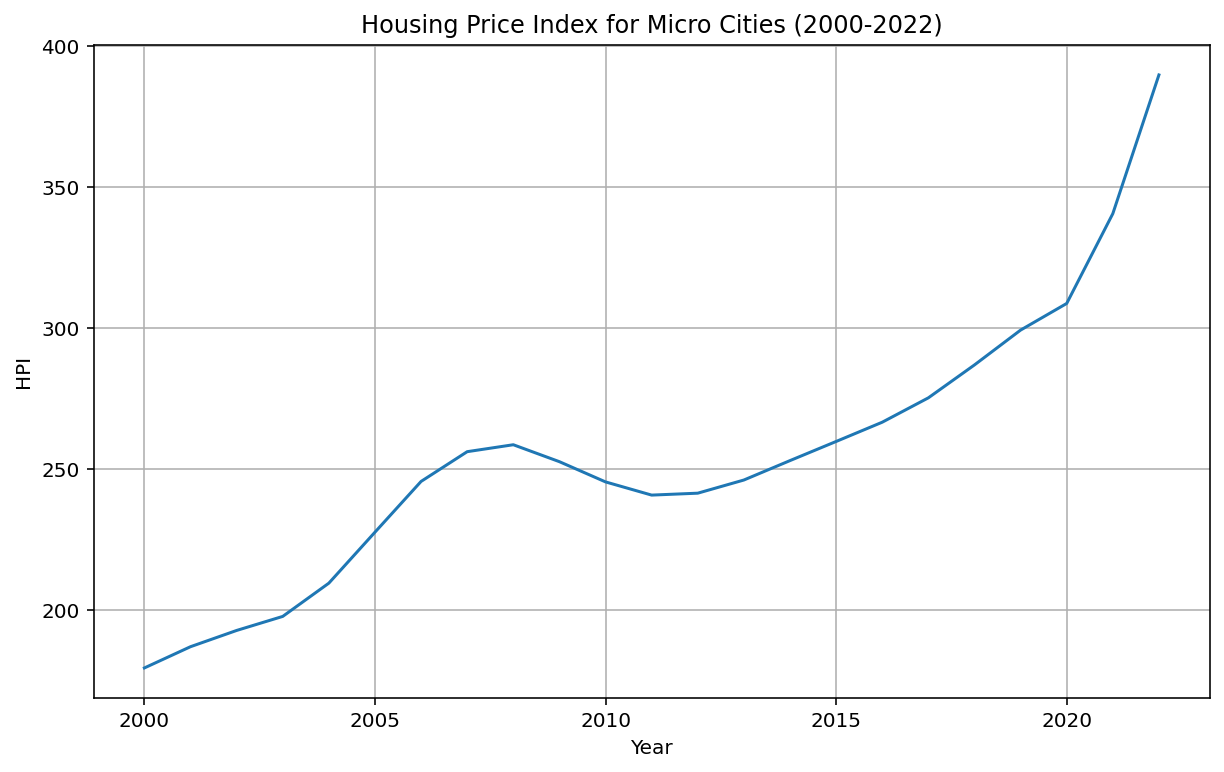

In [63]:
filter2 = merge[(merge['Year'] >= 2000) & (merge['Year'] <= 2022) & (~merge['liminal']) & (merge['micro'])]
mean_hpi2 = filter2.groupby('Year')['HPI'].mean()

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(mean_hpi2.index, mean_hpi2.values)
plt.title('Housing Price Index for Micro Cities (2000-2022)')
plt.xlabel('Year')
plt.ylabel('HPI')
plt.grid(True)
plt.show()

In [64]:
filter3 = merge[(merge['Year'] >= 2000) & (merge['Year'] <= 2022) & (~merge['liminal']) & (merge['metro'])]
mean_hpi3 = filter3.groupby('Year')['HPI'].mean()

/tmp/ipykernel_2410991/1944762128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter1.sort_values('Year', inplace=True)
/lustre/work/client/users/jvbritt/.conda/envs/ds_1300/lib/python3.9/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


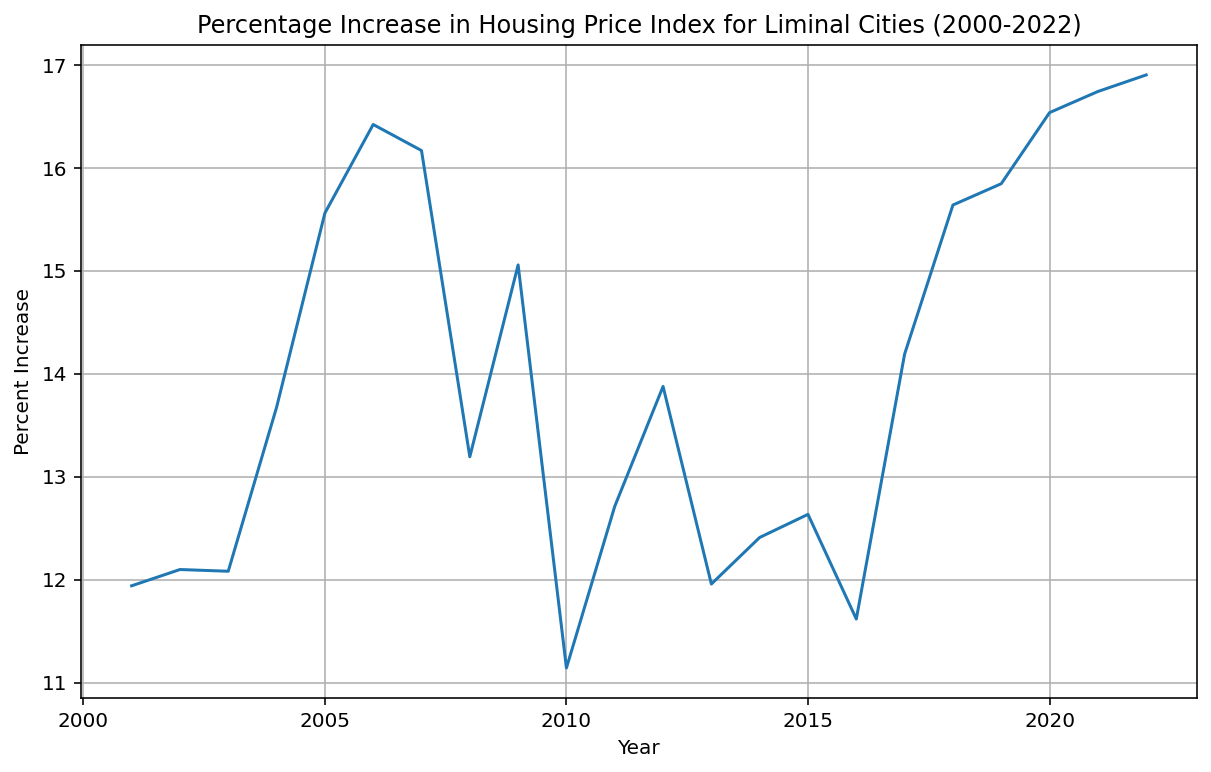

In [65]:
# Sort the data by 'Year' in ascending order
filter1.sort_values('Year', inplace=True)

# Calculate the percentage increase in HPI between consecutive years
filter1['Percent Increase'] = filter1['HPI'].pct_change() * 100

# Group the data by 'Year' and calculate the mean percent increase for each year
mean_percent_increase = filter1.groupby('Year')['Percent Increase'].mean()

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(mean_percent_increase.index, mean_percent_increase.values)
plt.title('Percentage Increase in Housing Price Index for Liminal Cities (2000-2022)')
plt.xlabel('Year')
plt.ylabel('Percent Increase')
plt.grid(True)
plt.show()

/tmp/ipykernel_2410991/1109199660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter2.sort_values('Year', inplace=True)
/lustre/work/client/users/jvbritt/.conda/envs/ds_1300/lib/python3.9/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


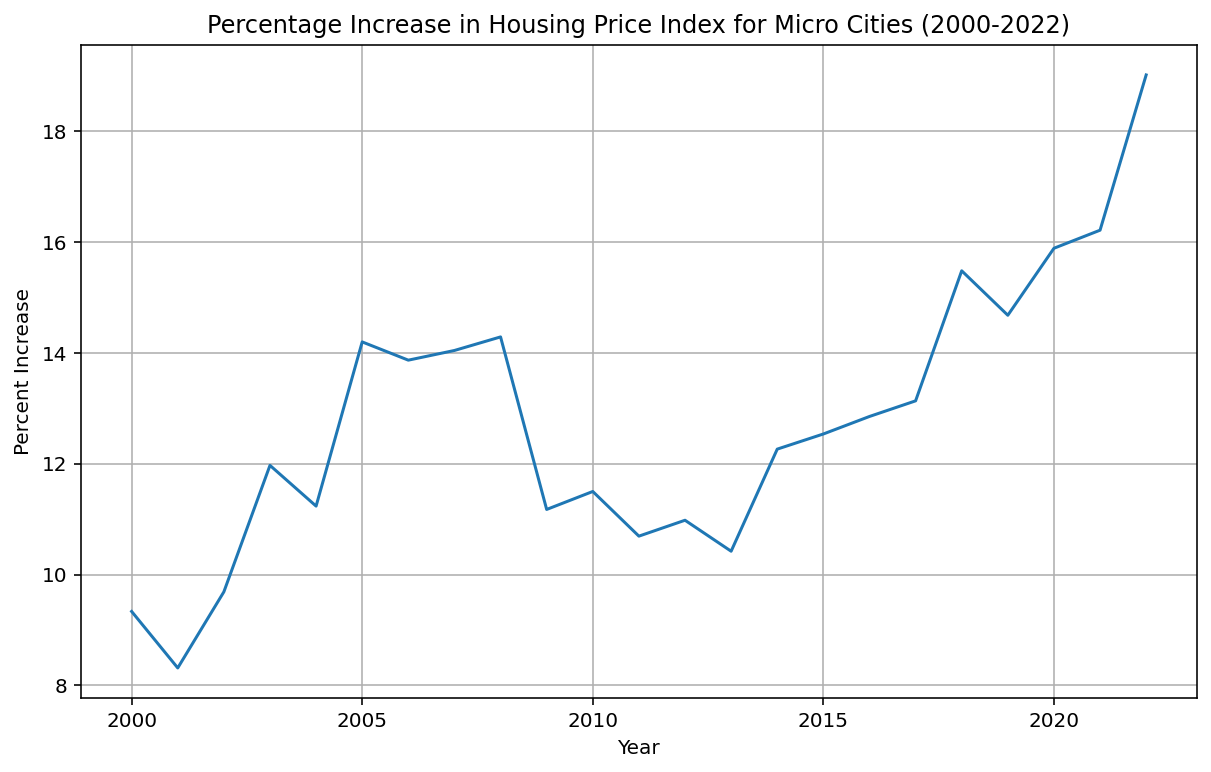

In [66]:
# Sort the data by 'Year' in ascending order
filter2.sort_values('Year', inplace=True)

# Calculate the percentage increase in HPI between consecutive years
filter2['Percent Increase'] = filter2['HPI'].pct_change() * 100

# Group the data by 'Year' and calculate the mean percent increase for each year
mean_percent_increase2 = filter2.groupby('Year')['Percent Increase'].mean()

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(mean_percent_increase2.index, mean_percent_increase2.values)
plt.title('Percentage Increase in Housing Price Index for Micro Cities (2000-2022)')
plt.xlabel('Year')
plt.ylabel('Percent Increase')
plt.grid(True)
plt.show()

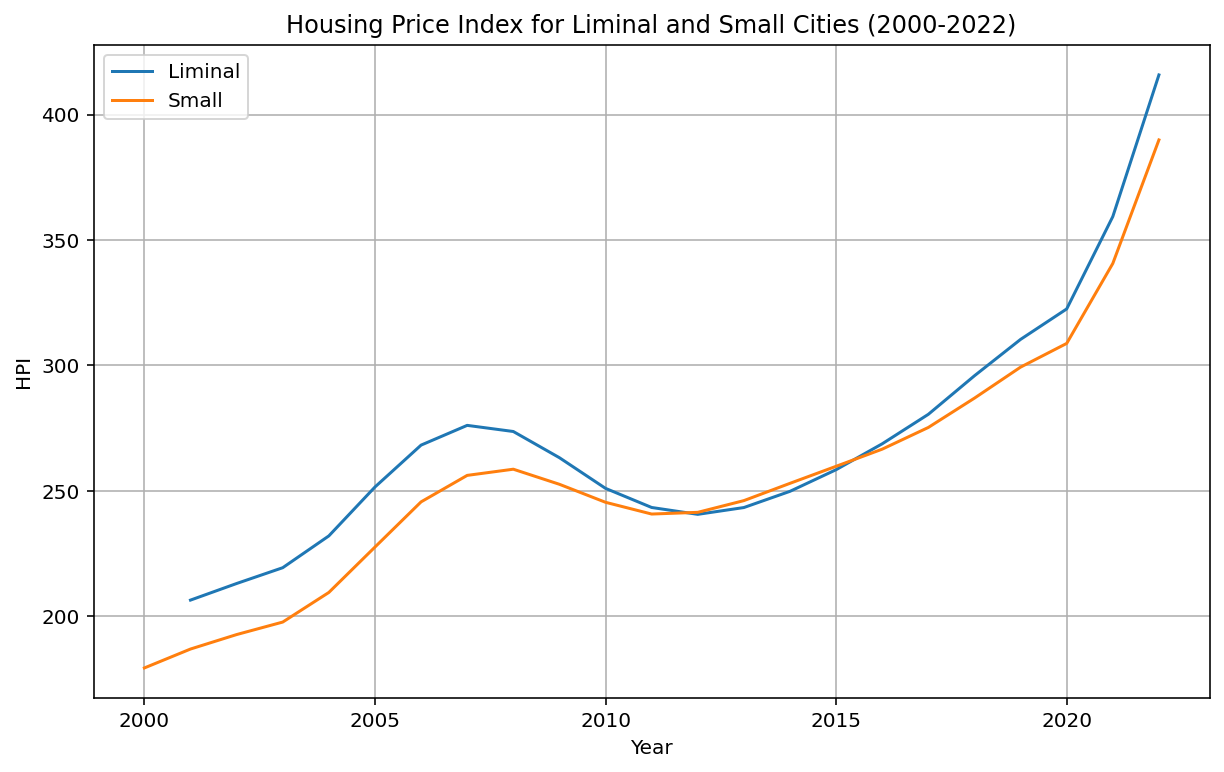

In [67]:

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(mean_hpi.index, mean_hpi.values, label = "Liminal")
plt.plot(mean_hpi2.index, mean_hpi2.values, label = "Small")
plt.title('Housing Price Index for Liminal and Small Cities (2000-2022)')
plt.xlabel('Year')
plt.ylabel('HPI')
plt.legend()
plt.grid(True)
plt.show()

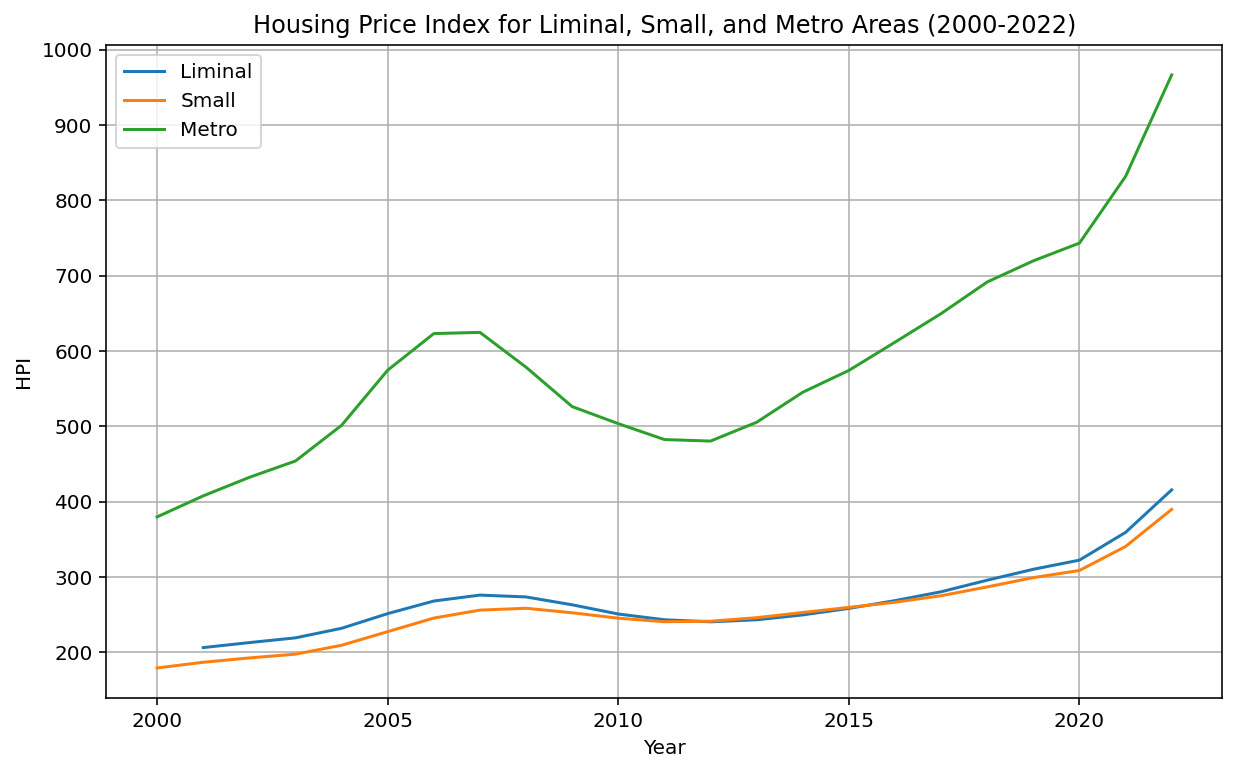

In [68]:

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(mean_hpi.index, mean_hpi.values, label = "Liminal")
plt.plot(mean_hpi2.index, mean_hpi2.values, label = "Small")
plt.plot(mean_hpi3.index, mean_hpi3.values, label = "Metro")
plt.title('Housing Price Index for Liminal, Small, and Metro Areas (2000-2022)')
plt.xlabel('Year')
plt.ylabel('HPI')
plt.legend()
plt.grid(True)
plt.show()

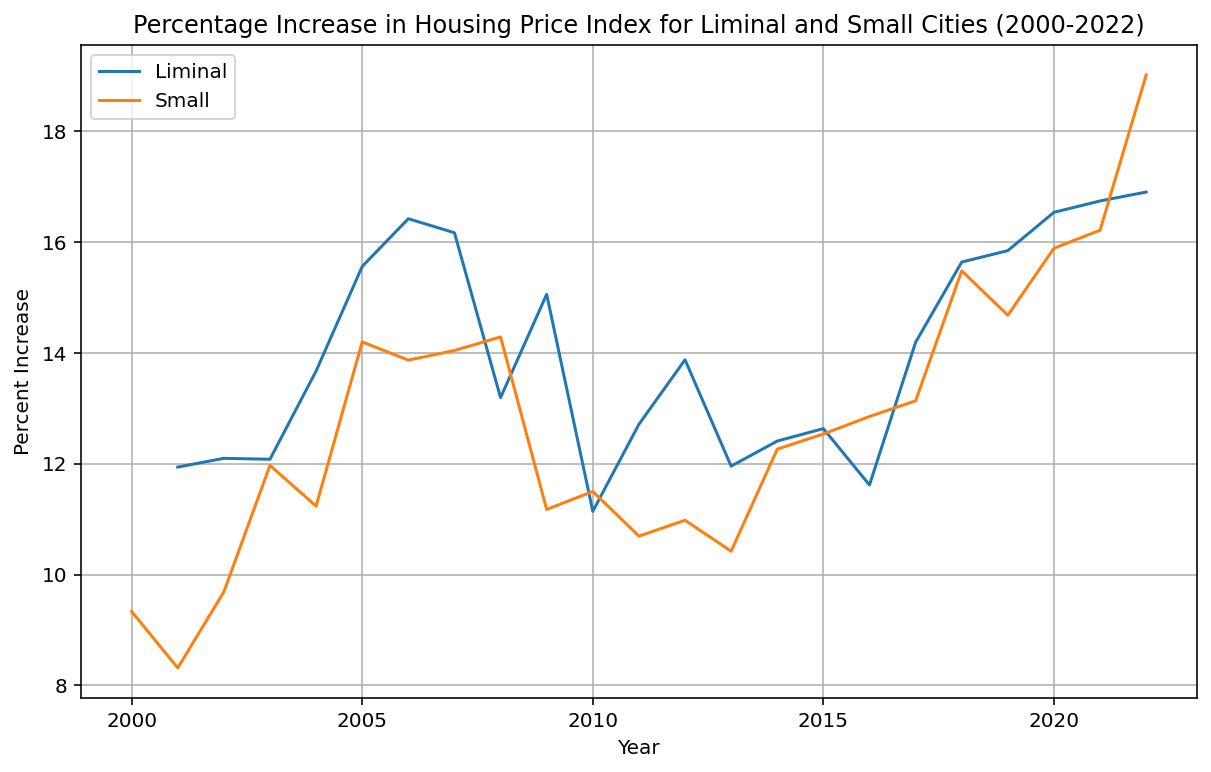

In [69]:


# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(mean_percent_increase.index, mean_percent_increase.values, label = "Liminal")
plt.plot(mean_percent_increase2.index, mean_percent_increase2.values, label = "Small")
plt.title('Percentage Increase in Housing Price Index for Liminal and Small Cities (2000-2022)')
plt.xlabel('Year')
plt.ylabel('Percent Increase')
plt.grid(True)
plt.legend()
plt.show()

In [70]:
# Sort the data by 'Year' in ascending order
filter3.sort_values('Year', inplace=True)

# Calculate the percentage increase in HPI between consecutive years
filter3['Percent Increase'] = filter3['HPI'].pct_change() * 100

# Group the data by 'Year' and calculate the mean percent increase for each year
mean_percent_increase3 = filter3.groupby('Year')['Percent Increase'].mean()

/tmp/ipykernel_2410991/2683404837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter3.sort_values('Year', inplace=True)
/lustre/work/client/users/jvbritt/.conda/envs/ds_1300/lib/python3.9/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


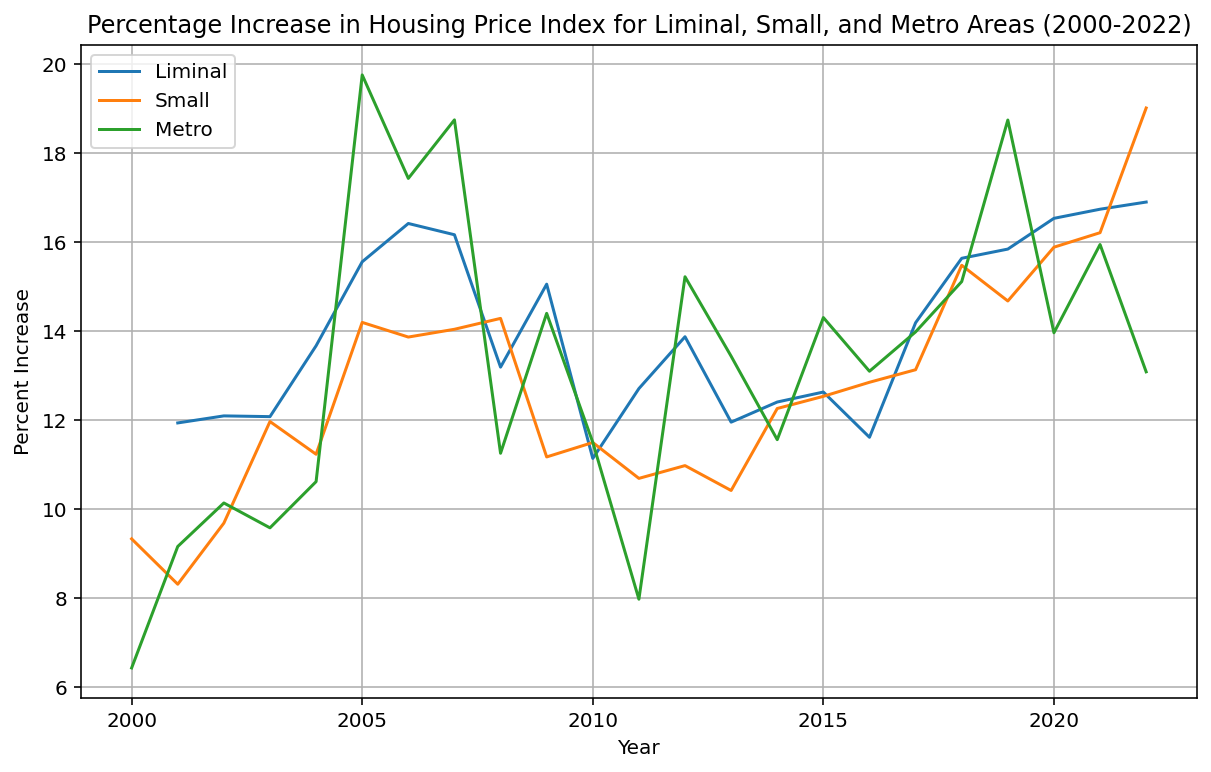

In [71]:
# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(mean_percent_increase.index, mean_percent_increase.values, label = "Liminal")
plt.plot(mean_percent_increase2.index, mean_percent_increase2.values, label = "Small")
plt.plot(mean_percent_increase3.index, mean_percent_increase3.values, label = "Metro")
plt.title('Percentage Increase in Housing Price Index for Liminal, Small, and Metro Areas (2000-2022)')
plt.xlabel('Year')
plt.ylabel('Percent Increase')
plt.grid(True)
plt.legend()
plt.show()